In [11]:
import pandas as pd
import requests
import requests_mock
import matplotlib.pyplot as plt
import seaborn as sns
import ast
%matplotlib inline

# MOCKS Set up

In [12]:
api_response = [{"name": "Andrew", "gender": "male", "probability": 1, "count": 5168}, {"name": "Rodrigo", "gender": "male", "probability": 1, "count": 1277}, {"name": "Wanis", "gender": "female", "probability": 1, "count": 1}, {"name": "Alice", "gender": "female", "probability": 1, "count": 1414}, {"name": "Maurice", "gender": "male", "probability": 0.98, "count": 221}, {"name": "Leana", "gender": "female", "probability": 1, "count": 19}, {"name": "Haas", "gender": "male", "probability": 1, "count": 5}, {"name": "Jason", "gender": "male", "probability": 1, "count": 4927}, {"name": "Geraldine", "gender": "female", "probability": 1, "count": 265}, {"name": "James", "gender": "male", "probability": 0.99, "count": 6359}, {"name": "Thandie", "gender": "female", "probability": 1, "count": 2}, {"name": "VS", "gender": "male", "probability": 1, "count": 1}, {"name": "Alaa", "gender": "male", "probability": 0.68, "count": 258}, {"name": "Apollo", "gender": "male", "probability": 1, "count": 12}, {"name": "Erin", "gender": "female", "probability": 0.99, "count": 2097}, {"name": "Charlie", "gender": "male", "probability": 0.79, "count": 1131}, {"name": "Russell", "gender": "male", "probability": 1, "count": 513}, {"name": "Sugata", "gender": "male", "probability": 1, "count": 1}, {"name": "Safwat", "gender": "male", "probability": 1, "count": 7}, {"name": "Al", "gender": "male", "probability": 0.94, "count": 563}, {"name": "Kakenya", "gender": None}, {"name": "Rufus", "gender": "male", "probability": 1, "count": 16}, {"name": "Maysoon", "gender": "female", "probability": 1, "count": 8}, {"name": "Abraham", "gender": "male", "probability": 1, "count": 292}, {"name": "Harald", "gender": "male", "probability": 1, "count": 80}, {"name": "Suzana", "gender": "female", "probability": 1, "count": 88}, {"name": "Margaret", "gender": "female", "probability": 0.98, "count": 1101}, {"name": "Gary", "gender": "male", "probability": 1, "count": 2132}, {"name": "Bassam", "gender": "male", "probability": 0.97, "count": 61}, {"name": "Samuel", "gender": "male", "probability": 1, "count": 1409}, {"name": "Arvind", "gender": "male", "probability": 1, "count": 73}, {"name": "Charles", "gender": "male", "probability": 1, "count": 1798}, {"name": "Julia", "gender": "female", "probability": 0.99, "count": 2152}, {"name": "Joachim", "gender": "male", "probability": 1, "count": 137}, {"name": "Larry", "gender": "male", "probability": 1, "count": 972}, {"name": "Megan", "gender": "female", "probability": 1, "count": 2639}, {"name": "Ron", "gender": "male", "probability": 0.98, "count": 1014}, {"name": "Bren\\u00e9", "gender": None}, {"name": "Knut", "gender": "male", "probability": 1, "count": 71}, {"name": "Taylor", "gender": "female", "probability": 0.63, "count": 1126}, {"name": "Ze", "gender": "male", "probability": 0.96, "count": 26}, {"name": "Gever", "gender": None}, {"name": "Caroline", "gender": "female", "probability": 1, "count": 2457}, {"name": "Handspring", "gender": None}, {"name": "Marina", "gender": "female", "probability": 0.99, "count": 1326}, {"name": "Kathryn", "gender": "female", "probability": 1, "count": 827}, {"name": "Mellody", "gender": None}, {"name": "Ari", "gender": "male", "probability": 0.76, "count": 308}, {"name": "Tim", "gender": "male", "probability": 0.99, "count": 2949}, {"name": "Raffaello", "gender": "male", "probability": 1, "count": 14}, {"name": "Kang", "gender": "male", "probability": 0.79, "count": 80}, {"name": "Sandra", "gender": "female", "probability": 1, "count": 4110}, {"name": "Kamal", "gender": "male", "probability": 0.97, "count": 279}, {"name": "Mia", "gender": "female", "probability": 0.99, "count": 699}, {"name": "Meaghan", "gender": "female", "probability": 1, "count": 130}, {"name": "Ethan", "gender": "male", "probability": 0.98, "count": 375}, {"name": "Neri", "gender": "female", "probability": 0.76, "count": 34}, {"name": "George", "gender": "male", "probability": 0.99, "count": 2098}, {"name": "Thomas", "gender": "male", "probability": 1, "count": 3753}, {"name": "Bill", "gender": "male", "probability": 1, "count": 1812}, {"name": "Rose", "gender": "female", "probability": 0.99, "count": 857}, {"name": "Rich", "gender": "male", "probability": 1, "count": 510}, {"name": "Meg", "gender": "female", "probability": 0.99, "count": 304}, {"name": "Lawrence", "gender": "male", "probability": 1, "count": 393}, {"name": "Sarah", "gender": "female", "probability": 1, "count": 8371}, {"name": "Lisa", "gender": "female", "probability": 1, "count": 6394}, {"name": "Wade", "gender": "male", "probability": 1, "count": 157}, {"name": "Bono", "gender": "male", "probability": 1, "count": 5}, {"name": "Elif", "gender": "female", "probability": 0.93, "count": 498}, {"name": "Cameron", "gender": "male", "probability": 0.94, "count": 614}, {"name": "Abe", "gender": "male", "probability": 0.96, "count": 76}, {"name": "Cosmin", "gender": "male", "probability": 1, "count": 14}, {"name": "C\\u00e9dric", "gender": "male", "probability": 1, "count": 2}, {"name": "Young-ha", "gender": None}, {"name": "Emily", "gender": "female", "probability": 1, "count": 3765}, {"name": "Carin", "gender": "female", "probability": 0.99, "count": 70}, {"name": "Shivani", "gender": "female", "probability": 1, "count": 60}, {"name": "Sting", "gender": "male", "probability": 1, "count": 10}, {"name": "Philip", "gender": "male", "probability": 1, "count": 1097}, {"name": "Ken", "gender": "male", "probability": 0.99, "count": 1435}, {"name": "Ludwick", "gender": "male", "probability": 1, "count": 3}, {"name": "Avi", "gender": "male", "probability": 0.77, "count": 103}, {"name": "Jim", "gender": "male", "probability": 1, "count": 2291}, {"name": "Sofia", "gender": "female", "probability": 0.99, "count": 1200}, {"name": "Uldus", "gender": None}, {"name": "Lux", "gender": "male", "probability": 0.71, "count": 7}, {"name": "Rob", "gender": "male", "probability": 0.99, "count": 2262}, {"name": "Jimmy", "gender": "male", "probability": 1, "count": 1416}, {"name": "Rives", "gender": None}, {"name": "Charmian", "gender": "female", "probability": 1, "count": 7}, {"name": "Bettina", "gender": "female", "probability": 1, "count": 156}, {"name": "Eduardo", "gender": "male", "probability": 1, "count": 1644}, {"name": "Clint", "gender": "male", "probability": 1, "count": 189}, {"name": "Quixotic", "gender": None}, {"name": "The", "gender": "female", "probability": 1, "count": 1}, {"name": "Burt", "gender": "male", "probability": 0.96, "count": 26}, {"name": "Ole", "gender": "male", "probability": 0.99, "count": 160}, {"name": "Marc", "gender": "male", "probability": 1, "count": 1555}, {"name": "Jean-Baptiste", "gender": "male", "probability": 1, "count": 89}, {"name": "Robert", "gender": "male", "probability": 1, "count": 5222}, {"name": "Eric", "gender": "male", "probability": 1, "count": 4110}, {"name": "Dan", "gender": "male", "probability": 0.98, "count": 3240}, {"name": "Hannah", "gender": "female", "probability": 1, "count": 1949}, {"name": "Simon", "gender": "male", "probability": 0.99, "count": 2443}, {"name": "Bryan", "gender": "male", "probability": 1, "count": 1311}, {"name": "Morgana", "gender": "female", "probability": 1, "count": 11}, {"name": "Nadine", "gender": "female", "probability": 1, "count": 672}, {"name": "Bjarke", "gender": "male", "probability": 1, "count": 12}, {"name": "Harish", "gender": "male", "probability": 1, "count": 79}, {"name": "Jocelyne", "gender": "female", "probability": 1, "count": 91}, {"name": "Rodney", "gender": "male", "probability": 1, "count": 319}, {"name": "Talithia", "gender": None}, {"name": "Dennis", "gender": "male", "probability": 0.99, "count": 1279}, {"name": "Stacey", "gender": "female", "probability": 0.98, "count": 1034}, {"name": "Audrey", "gender": "female", "probability": 1, "count": 1057}, {"name": "Neha", "gender": "female", "probability": 1, "count": 268}, {"name": "Julie", "gender": "female", "probability": 1, "count": 4260}, {"name": "Daniele", "gender": "male", "probability": 0.86, "count": 587}, {"name": "Blaise", "gender": "male", "probability": 0.96, "count": 24}, {"name": "Fei-Fei", "gender": None}, {"name": "Boyd", "gender": "male", "probability": 1, "count": 57}, {"name": "Helen", "gender": "female", "probability": 0.99, "count": 2201}, {"name": "Rita", "gender": "female", "probability": 1, "count": 1097}, {"name": "Aditi", "gender": "female", "probability": 1, "count": 131}, {"name": "Nic", "gender": "male", "probability": 0.65, "count": 241}, {"name": "Johann", "gender": "male", "probability": 0.99, "count": 117}, {"name": "Catherine", "gender": "female", "probability": 1, "count": 2372}, {"name": "Taryn", "gender": "female", "probability": 0.99, "count": 116}, {"name": "Joshua", "gender": "male", "probability": 0.99, "count": 1570}, {"name": "Jill", "gender": "female", "probability": 1, "count": 1335}, {"name": "Lucianne", "gender": "female", "probability": 1, "count": 2}, {"name": "Yanis", "gender": "female", "probability": 0.6, "count": 45}, {"name": "Paula", "gender": "female", "probability": 0.99, "count": 2298}, {"name": "Casey", "gender": "female", "probability": 0.56, "count": 778}, {"name": "Roxane", "gender": "female", "probability": 1, "count": 81}, {"name": "Boniface", "gender": "male", "probability": 1, "count": 8}, {"name": "Ruth", "gender": "female", "probability": 1, "count": 1344}, {"name": "Kate", "gender": "female", "probability": 0.99, "count": 2254}, {"name": "BLACK", "gender": "male", "probability": 0.68, "count": 153}, {"name": "Janine", "gender": "female", "probability": 1, "count": 397}, {"name": "Stuart", "gender": "male", "probability": 0.99, "count": 759}, {"name": "Jeff", "gender": "male", "probability": 1, "count": 2925}, {"name": "Mac", "gender": "male", "probability": 0.92, "count": 161}, {"name": "Luma", "gender": "female", "probability": 1, "count": 9}, {"name": "JD", "gender": "male", "probability": 0.88, "count": 122}, {"name": "Oliver", "gender": "male", "probability": 0.99, "count": 750}, {"name": "Terry", "gender": "male", "probability": 0.78, "count": 1429}, {"name": "Sangu", "gender": None}, {"name": "Bobby", "gender": "male", "probability": 0.96, "count": 745}, {"name": "OK", "gender": "male", "probability": 0.86, "count": 7}, {"name": "Diana", "gender": "female", "probability": 0.99, "count": 2885}, {"name": "May", "gender": "female", "probability": 0.97, "count": 502}, {"name": "Aimee", "gender": "female", "probability": 1, "count": 489}, {"name": "Garrett", "gender": "male", "probability": 1, "count": 293}, {"name": "eL", "gender": "male", "probability": 0.74, "count": 349}, {"name": "Sheena", "gender": "female", "probability": 1, "count": 203}, {"name": "Rebecca", "gender": "female", "probability": 1, "count": 3182}, {"name": "Jamie", "gender": "male", "probability": 0.53, "count": 2428}, {"name": "Emilie", "gender": "female", "probability": 0.99, "count": 788}, {"name": "Nicholas", "gender": "male", "probability": 1, "count": 1176}, {"name": "Tali", "gender": "female", "probability": 0.91, "count": 34}, {"name": "Sandrine", "gender": "female", "probability": 1, "count": 447}, {"name": "Nagin", "gender": None}, {"name": "Jared", "gender": "male", "probability": 1, "count": 667}, {"name": "Ueli", "gender": "male", "probability": 1, "count": 3}, {"name": "Joseph", "gender": "male", "probability": 0.99, "count": 2213}, {"name": "Niall", "gender": "male", "probability": 1, "count": 57}, {"name": "Linda", "gender": "female", "probability": 1, "count": 4323}, {"name": "Nikolai", "gender": "male", "probability": 0.98, "count": 45}, {"name": "Sam", "gender": "male", "probability": 0.76, "count": 3336}, {"name": "Philippe", "gender": "male", "probability": 0.99, "count": 605}, {"name": "ShaoLan", "gender": None}, {"name": "Gian", "gender": "male", "probability": 0.99, "count": 133}, {"name": "Nancy", "gender": "female", "probability": 1, "count": 2716}, {"name": "Guy", "gender": "male", "probability": 1, "count": 445}, {"name": "Malte", "gender": "male", "probability": 1, "count": 21}, {"name": "Diane", "gender": "female", "probability": 0.99, "count": 1649}, {"name": "Bonnie", "gender": "female", "probability": 0.99, "count": 784}, {"name": "Lesley", "gender": "female", "probability": 0.98, "count": 494}, {"name": "Dalia", "gender": "female", "probability": 1, "count": 242}, {"name": "Peter", "gender": "male", "probability": 1, "count": 4373}, {"name": "Juan", "gender": "male", "probability": 0.99, "count": 4584}, {"name": "Sean", "gender": "male", "probability": 1, "count": 2515}, {"name": "Molly", "gender": "female", "probability": 0.99, "count": 780}, {"name": "Jackson", "gender": "male", "probability": 0.98, "count": 178}, {"name": "Gustavo", "gender": "male", "probability": 1, "count": 1161}, {"name": "Joi", "gender": "female", "probability": 0.94, "count": 18}, {"name": "Erik", "gender": "male", "probability": 0.99, "count": 1072}, {"name": "Isaac", "gender": "male", "probability": 1, "count": 472}, {"name": "Maya", "gender": "female", "probability": 0.97, "count": 427}, {"name": "Laurel", "gender": "female", "probability": 1, "count": 165}, {"name": "Boaz", "gender": "male", "probability": 1, "count": 18}, {"name": "Vijay", "gender": "male", "probability": 0.98, "count": 319}, {"name": "Derek", "gender": "male", "probability": 1, "count": 1169}, {"name": "Aubrey", "gender": "female", "probability": 0.82, "count": 113}, {"name": "Juno", "gender": "male", "probability": 0.67, "count": 9}, {"name": "Karen", "gender": "female", "probability": 1, "count": 5462}, {"name": "Tabetha", "gender": "female", "probability": 1, "count": 10}, {"name": "Sara", "gender": "female", "probability": 0.99, "count": 4435}, {"name": "Tshering", "gender": "female", "probability": 0.5, "count": 2}, {"name": "Tania", "gender": "female", "probability": 1, "count": 1022}, {"name": "Marla", "gender": "female", "probability": 1, "count": 142}, {"name": "Benjamin", "gender": "male", "probability": 1, "count": 1475}, {"name": "Phil", "gender": "male", "probability": 0.99, "count": 1012}, {"name": "Jessica", "gender": "female", "probability": 1, "count": 6696}, {"name": "Helder", "gender": "male", "probability": 1, "count": 28}, {"name": "His", "gender": "female", "probability": 1, "count": 10}, {"name": "Ismael", "gender": "male", "probability": 1, "count": 257}, {"name": "E.O.", "gender": None}, {"name": "Grace", "gender": "female", "probability": 0.99, "count": 1125}, {"name": "Lennart", "gender": "male", "probability": 1, "count": 56}, {"name": "Steve", "gender": "male", "probability": 1, "count": 3965}, {"name": "Esther", "gender": "female", "probability": 1, "count": 930}, {"name": "Shah", "gender": "male", "probability": 0.96, "count": 52}, {"name": "Kevin", "gender": "male", "probability": 1, "count": 5362}, {"name": "Jack", "gender": "male", "probability": 0.99, "count": 1993}, {"name": "Didier", "gender": "male", "probability": 0.99, "count": 204}, {"name": "Laura", "gender": "female", "probability": 1, "count": 7953}, {"name": "Carolyn", "gender": "female", "probability": 1, "count": 991}, {"name": "Amy", "gender": "female", "probability": 0.99, "count": 4334}, {"name": "Maz", "gender": "female", "probability": 0.7, "count": 33}, {"name": "Evelyn", "gender": "female", "probability": 1, "count": 754}, {"name": "Chip", "gender": "male", "probability": 0.98, "count": 131}, {"name": "Rishi", "gender": "male", "probability": 1, "count": 108}, {"name": "Keren", "gender": "female", "probability": 1, "count": 120}, {"name": "Rajiv", "gender": "male", "probability": 1, "count": 60}, {"name": "Amber", "gender": "female", "probability": 1, "count": 1725}, {"name": "Shereen", "gender": "female", "probability": 1, "count": 53}, {"name": "Keith", "gender": "male", "probability": 0.99, "count": 1417}, {"name": "Dustin", "gender": "male", "probability": 1, "count": 529}, {"name": "Pranav", "gender": "male", "probability": 1, "count": 62}, {"name": "Renny", "gender": "male", "probability": 0.65, "count": 23}, {"name": "Takaharu", "gender": None}, {"name": "Patricia", "gender": "female", "probability": 1, "count": 3488}, {"name": "Lidia", "gender": "female", "probability": 1, "count": 348}, {"name": "Improv", "gender": None}, {"name": "Mona", "gender": "female", "probability": 1, "count": 519}, {"name": "Glenn", "gender": "male", "probability": 0.99, "count": 652}, {"name": "Jane", "gender": "female", "probability": 0.99, "count": 1796}, {"name": "Dean", "gender": "male", "probability": 0.96, "count": 914}, {"name": "Regina", "gender": "female", "probability": 1, "count": 497}, {"name": "Geert", "gender": "male", "probability": 1, "count": 40}, {"name": "Shai", "gender": "male", "probability": 0.67, "count": 49}, {"name": "Cesar", "gender": "male", "probability": 1, "count": 1120}, {"name": "Mick", "gender": "male", "probability": 0.99, "count": 273}, {"name": "Tristan", "gender": "male", "probability": 0.95, "count": 331}, {"name": "Adora", "gender": "female", "probability": 1, "count": 3}, {"name": "Roselinde", "gender": "female", "probability": 1, "count": 1}, {"name": "Christopher", "gender": "male", "probability": 1, "count": 2339}, {"name": "Sakena", "gender": "female", "probability": 1, "count": 1}, {"name": "Travis", "gender": "male", "probability": 1, "count": 985}, {"name": "Malcolm", "gender": "male", "probability": 1, "count": 227}, {"name": "Judson", "gender": "male", "probability": 1, "count": 10}, {"name": "Jay", "gender": "male", "probability": 0.9, "count": 1882}, {"name": "Auke", "gender": "female", "probability": 1, "count": 1}, {"name": "Renata", "gender": "female", "probability": 0.99, "count": 309}, {"name": "Mitch", "gender": "male", "probability": 0.93, "count": 358}, {"name": "Annie", "gender": "female", "probability": 1, "count": 1120}, {"name": "Martin", "gender": "male", "probability": 1, "count": 3568}, {"name": "Monica", "gender": "female", "probability": 1, "count": 2787}, {"name": "Stewart", "gender": "male", "probability": 0.99, "count": 197}, {"name": "Ziauddin", "gender": "male", "probability": 1, "count": 1}, {"name": "P.W.", "gender": None}, {"name": "Alisa", "gender": "female", "probability": 0.98, "count": 186}, {"name": "Luis", "gender": "male", "probability": 1, "count": 4053}, {"name": "Camille", "gender": "female", "probability": 0.94, "count": 663}, {"name": "Courtney", "gender": "female", "probability": 0.97, "count": 1324}, {"name": "Matthieu", "gender": "male", "probability": 1, "count": 261}, {"name": "Danielle", "gender": "female", "probability": 1, "count": 2429}, {"name": "Amanda", "gender": "female", "probability": 1, "count": 4907}, {"name": "Einstein", "gender": "male", "probability": 1, "count": 4}, {"name": "Stella", "gender": "female", "probability": 1, "count": 441}, {"name": "Louie", "gender": "male", "probability": 0.88, "count": 123}, {"name": "Barbara", "gender": "female", "probability": 1, "count": 2837}, {"name": "Alan", "gender": "male", "probability": 1, "count": 2079}, {"name": "Tea", "gender": "female", "probability": 0.92, "count": 78}, {"name": "Dame", "gender": "female", "probability": 0.8, "count": 10}, {"name": "Jenna", "gender": "female", "probability": 1, "count": 886}, {"name": "Kelly", "gender": "female", "probability": 0.94, "count": 3831}, {"name": "Elyn", "gender": "female", "probability": 0.83, "count": 6}, {"name": "Mehdi", "gender": "male", "probability": 0.99, "count": 329}, {"name": "Julian", "gender": "male", "probability": 1, "count": 1079}, {"name": "Mariano", "gender": "male", "probability": 1, "count": 310}, {"name": "Ronny", "gender": "male", "probability": 0.99, "count": 273}, {"name": "Bruce", "gender": "male", "probability": 1, "count": 800}, {"name": "Kenichi", "gender": "male", "probability": 1, "count": 7}, {"name": "Karima", "gender": "female", "probability": 1, "count": 69}, {"name": "Stephen", "gender": "male", "probability": 1, "count": 2608}, {"name": "Elon", "gender": "male", "probability": 1, "count": 3}, {"name": "Danny", "gender": "male", "probability": 0.95, "count": 1633}, {"name": "John", "gender": "male", "probability": 0.99, "count": 9931}, {"name": "Johnny", "gender": "male", "probability": 0.99, "count": 955}, {"name": "Manu", "gender": "male", "probability": 0.77, "count": 338}, {"name": "Dave", "gender": "male", "probability": 1, "count": 2605}, {"name": "Isabel", "gender": "female", "probability": 1, "count": 1094}, {"name": "Ramesh", "gender": "male", "probability": 1, "count": 146}, {"name": "Noy", "gender": "female", "probability": 0.95, "count": 22}, {"name": "Russ", "gender": "male", "probability": 1, "count": 246}, {"name": "Rainer", "gender": "male", "probability": 0.99, "count": 84}, {"name": "Barry", "gender": "male", "probability": 0.98, "count": 635}, {"name": "Alison", "gender": "female", "probability": 0.99, "count": 1288}, {"name": "Nick", "gender": "male", "probability": 0.99, "count": 3326}, {"name": "Beardyman", "gender": None}, {"name": "Alastair", "gender": "male", "probability": 1, "count": 90}, {"name": "Neil", "gender": "male", "probability": 1, "count": 1036}, {"name": "Tristram", "gender": "male", "probability": 1, "count": 5}, {"name": "Andy", "gender": "male", "probability": 0.95, "count": 3139}, {"name": "Janet", "gender": "female", "probability": 1, "count": 1579}, {"name": "Ricardo", "gender": "male", "probability": 1, "count": 1916}, {"name": "Susan", "gender": "female", "probability": 1, "count": 3203}, {"name": "Dambisa", "gender": None}, {"name": "Shigeru", "gender": "male", "probability": 1, "count": 3}, {"name": "Pattie", "gender": "female", "probability": 0.94, "count": 35}, {"name": "Tom", "gender": "male", "probability": 1, "count": 3736}, {"name": "Aaron", "gender": "male", "probability": 1, "count": 2280}, {"name": "Jennifer", "gender": "female", "probability": 1, "count": 6717}, {"name": "Marcel", "gender": "male", "probability": 0.96, "count": 403}, {"name": "Yves", "gender": "male", "probability": 0.98, "count": 265}, {"name": "Geena", "gender": "female", "probability": 1, "count": 14}, {"name": "Tyler", "gender": "male", "probability": 0.98, "count": 1497}, {"name": "Sue", "gender": "female", "probability": 1, "count": 1825}, {"name": "Harry", "gender": "male", "probability": 0.99, "count": 844}, {"name": "Anjan", "gender": "male", "probability": 1, "count": 5}, {"name": "Mark", "gender": "male", "probability": 1, "count": 6176}, {"name": "Manwar", "gender": "male", "probability": 1, "count": 1}, {"name": "Ernesto", "gender": "male", "probability": 1, "count": 381}, {"name": "J.J.", "gender": "male", "probability": 0.81, "count": 21}, {"name": "Greg", "gender": "male", "probability": 1, "count": 1852}, {"name": "Rory", "gender": "male", "probability": 0.94, "count": 226}, {"name": "Mandy", "gender": "female", "probability": 0.99, "count": 1085}, {"name": "Ashley", "gender": "female", "probability": 0.9, "count": 3897}, {"name": "Eleanor", "gender": "female", "probability": 1, "count": 263}, {"name": "Marcin", "gender": "male", "probability": 1, "count": 132}, {"name": "Ric", "gender": "male", "probability": 1, "count": 99}, {"name": "Stefan", "gender": "male", "probability": 1, "count": 917}, {"name": "Stanley", "gender": "male", "probability": 0.96, "count": 221}, {"name": "Elliot", "gender": "male", "probability": 1, "count": 227}, {"name": "Kaki", "gender": "female", "probability": 0.6, "count": 10}, {"name": "Colin", "gender": "male", "probability": 0.99, "count": 954}, {"name": "Daniel", "gender": "male", "probability": 1, "count": 8180}, {"name": "Fabian", "gender": "male", "probability": 1, "count": 637}, {"name": "Melissa", "gender": "female", "probability": 1, "count": 4400}, {"name": "Manuel", "gender": "male", "probability": 1, "count": 1954}, {"name": "Sanjay", "gender": "male", "probability": 1, "count": 212}, {"name": "Donald", "gender": "male", "probability": 1, "count": 493}, {"name": "Ellen", "gender": "female", "probability": 1, "count": 942}, {"name": "Frans", "gender": "male", "probability": 0.96, "count": 70}, {"name": "Sherwin", "gender": "male", "probability": 1, "count": 20}, {"name": "Don", "gender": "male", "probability": 0.99, "count": 1025}, {"name": "Sirena", "gender": "female", "probability": 1, "count": 16}, {"name": "Drew", "gender": "male", "probability": 0.95, "count": 710}, {"name": "Randall", "gender": "male", "probability": 0.99, "count": 176}, {"name": "Kio", "gender": None}, {"name": "Vern\\u0101", "gender": None}, {"name": "Anthony", "gender": "male", "probability": 1, "count": 3029}, {"name": "Carl", "gender": "male", "probability": 1, "count": 929}, {"name": "Fahad", "gender": "male", "probability": 0.99, "count": 179}, {"name": "Alexis", "gender": "male", "probability": 0.52, "count": 1224}, {"name": "Lucy", "gender": "female", "probability": 0.97, "count": 1403}, {"name": "Yang", "gender": "male", "probability": 0.65, "count": 93}, {"name": "Suzanne", "gender": "female", "probability": 1, "count": 1024}, {"name": "Jeremy", "gender": "male", "probability": 0.99, "count": 1840}, {"name": "Elizabeth", "gender": "female", "probability": 1, "count": 3508}, {"name": "Iwan", "gender": "male", "probability": 1, "count": 68}, {"name": "Kitra", "gender": None}, {"name": "Mihaly", "gender": None}, {"name": "Sebastian", "gender": "male", "probability": 1, "count": 1459}, {"name": "William", "gender": "male", "probability": 1, "count": 2626}, {"name": "Yassmin", "gender": "female", "probability": 0.86, "count": 7}, {"name": "Clifford", "gender": "male", "probability": 1, "count": 93}, {"name": "Usman", "gender": "male", "probability": 0.99, "count": 102}, {"name": "Naturally", "gender": None}, {"name": "Alejandro", "gender": "male", "probability": 1, "count": 1951}, {"name": "Shonda", "gender": "female", "probability": 1, "count": 26}, {"name": "Reggie", "gender": "male", "probability": 0.96, "count": 96}, {"name": "Navi", "gender": "male", "probability": 0.75, "count": 12}, {"name": "Hetain", "gender": "male", "probability": 1, "count": 1}, {"name": "Shaka", "gender": "male", "probability": 0.87, "count": 15}, {"name": "Shane", "gender": "male", "probability": 0.91, "count": 963}, {"name": "Parul", "gender": "female", "probability": 0.95, "count": 55}, {"name": "Joe", "gender": "male", "probability": 0.99, "count": 3679}, {"name": "Ruby", "gender": "female", "probability": 0.97, "count": 388}, {"name": "Leila", "gender": "female", "probability": 1, "count": 375}, {"name": "Morgan", "gender": "female", "probability": 0.64, "count": 847}, {"name": "Uri", "gender": "male", "probability": 0.86, "count": 28}, {"name": "Kirby", "gender": "female", "probability": 0.54, "count": 70}, {"name": "Joan", "gender": "female", "probability": 0.82, "count": 1017}, {"name": "Benedetta", "gender": "female", "probability": 1, "count": 79}, {"name": "Rachel", "gender": "female", "probability": 1, "count": 4021}, {"name": "Pilobolus", "gender": None}, {"name": "Sleepy", "gender": "female", "probability": 0.5, "count": 8}, {"name": "Bel", "gender": "female", "probability": 0.88, "count": 48}, {"name": "Ben", "gender": "male", "probability": 0.99, "count": 3363}, {"name": "Astro", "gender": "female", "probability": 0.67, "count": 3}, {"name": "Kenneth", "gender": "male", "probability": 1, "count": 1020}, {"name": "Theo", "gender": "male", "probability": 0.97, "count": 145}, {"name": "Sergey", "gender": "male", "probability": 0.99, "count": 117}, {"name": "Sherry", "gender": "female", "probability": 0.99, "count": 694}, {"name": "Robin", "gender": "female", "probability": 0.59, "count": 1628}, {"name": "Jae", "gender": "male", "probability": 0.58, "count": 90}, {"name": "Shimpei", "gender": "male", "probability": 1, "count": 1}, {"name": "Olivier", "gender": "male", "probability": 0.99, "count": 715}, {"name": "Alex", "gender": "male", "probability": 0.87, "count": 5856}, {"name": "Steven", "gender": "male", "probability": 1, "count": 2600}, {"name": "Hyeonseo", "gender": None}, {"name": "Wendy", "gender": "female", "probability": 0.99, "count": 1964}, {"name": "Mikko", "gender": "male", "probability": 1, "count": 186}, {"name": "iO", "gender": "female", "probability": 0.63, "count": 8}, {"name": "Anil", "gender": "male", "probability": 0.99, "count": 274}, {"name": "Conrad", "gender": "male", "probability": 1, "count": 82}, {"name": "Ralph", "gender": "male", "probability": 1, "count": 314}, {"name": "Raymond", "gender": "male", "probability": 1, "count": 770}, {"name": "Sebasti\\u00e3o", "gender": "male", "probability": 1, "count": 3}, {"name": "Birke", "gender": "female", "probability": 1, "count": 1}, {"name": "Graham", "gender": "male", "probability": 1, "count": 603}, {"name": "Moshe", "gender": "male", "probability": 0.98, "count": 60}, {"name": "Antonio", "gender": "male", "probability": 1, "count": 2290}, {"name": "Alec", "gender": "male", "probability": 0.97, "count": 188}, {"name": "Shashi", "gender": "male", "probability": 0.71, "count": 31}, {"name": "Brian", "gender": "male", "probability": 1, "count": 4600}, {"name": "Bunker", "gender": None}, {"name": "Nathan", "gender": "male", "probability": 1, "count": 1632}, {"name": "Celeste", "gender": "female", "probability": 1, "count": 302}, {"name": "Ang\\u00e9lica", "gender": "female", "probability": 1, "count": 1}, {"name": "Toby", "gender": "male", "probability": 0.88, "count": 312}, {"name": "Aomawa", "gender": None}, {"name": "Bjorn", "gender": "male", "probability": 1, "count": 54}, {"name": "Caleb", "gender": "male", "probability": 0.99, "count": 354}, {"name": "Temple", "gender": "female", "probability": 0.8, "count": 5}, {"name": "Sarah-Jayne", "gender": "female", "probability": 1, "count": 16}, {"name": "Ramsey", "gender": "male", "probability": 0.91, "count": 11}, {"name": "Jamila", "gender": "female", "probability": 1, "count": 48}, {"name": "Seth", "gender": "male", "probability": 1, "count": 373}, {"name": "Roger", "gender": "male", "probability": 1, "count": 1220}, {"name": "Hugh", "gender": "male", "probability": 1, "count": 174}, {"name": "Daphne", "gender": "female", "probability": 1, "count": 203}, {"name": "Bernie", "gender": "male", "probability": 0.75, "count": 134}, {"name": "Alyson", "gender": "female", "probability": 0.99, "count": 139}, {"name": "Deb", "gender": "female", "probability": 0.99, "count": 540}, {"name": "Carter", "gender": "male", "probability": 0.92, "count": 102}, {"name": "Lorrie", "gender": "female", "probability": 1, "count": 56}, {"name": "Francesco", "gender": "male", "probability": 1, "count": 1093}, {"name": "Tony", "gender": "male", "probability": 1, "count": 3071}, {"name": "Jonathan", "gender": "male", "probability": 1, "count": 3702}, {"name": "Billy", "gender": "male", "probability": 0.98, "count": 913}, {"name": "Kiran", "gender": "female", "probability": 0.51, "count": 274}, {"name": "Allan", "gender": "male", "probability": 1, "count": 590}, {"name": "Eve", "gender": "female", "probability": 0.99, "count": 324}, {"name": "Shea", "gender": "female", "probability": 0.68, "count": 100}, {"name": "Curtis", "gender": "male", "probability": 1, "count": 311}, {"name": "Angela", "gender": "female", "probability": 1, "count": 3511}, {"name": "Hamish", "gender": "male", "probability": 1, "count": 38}, {"name": "Arianna", "gender": "female", "probability": 0.99, "count": 189}, {"name": "Jinsop", "gender": None}, {"name": "Mary", "gender": "female", "probability": 1, "count": 4440}, {"name": "Josh", "gender": "male", "probability": 1, "count": 2597}, {"name": "Chris", "gender": "male", "probability": 0.93, "count": 8631}, {"name": "Anne", "gender": "female", "probability": 1, "count": 2461}, {"name": "Jon", "gender": "male", "probability": 1, "count": 1790}, {"name": "Heribert", "gender": None}, {"name": "Chelsea", "gender": "female", "probability": 1, "count": 905}, {"name": "Arthur", "gender": "male", "probability": 0.98, "count": 547}, {"name": "Kwame", "gender": "male", "probability": 0.97, "count": 29}, {"name": "Rutger", "gender": "male", "probability": 1, "count": 26}, {"name": "Skylar", "gender": "male", "probability": 0.59, "count": 56}, {"name": "Edward", "gender": "male", "probability": 1, "count": 1015}, {"name": "Majora", "gender": None}, {"name": "Yuval", "gender": "male", "probability": 0.78, "count": 49}, {"name": "Tavi", "gender": "male", "probability": 0.57, "count": 7}, {"name": "Britta", "gender": "female", "probability": 1, "count": 130}, {"name": "Riccardo", "gender": "male", "probability": 1, "count": 288}, {"name": "Itay", "gender": "male", "probability": 1, "count": 42}, {"name": "Sally", "gender": "female", "probability": 0.99, "count": 1136}, {"name": "Frank", "gender": "male", "probability": 1, "count": 1565}, {"name": "Dong", "gender": "male", "probability": 0.89, "count": 46}, {"name": "Grady", "gender": "male", "probability": 0.74, "count": 43}, {"name": "Jinha", "gender": "female", "probability": 1, "count": 1}, {"name": "Matt", "gender": "male", "probability": 1, "count": 4915}, {"name": "Marco", "gender": "male", "probability": 0.99, "count": 2493}, {"name": "Scott", "gender": "male", "probability": 1, "count": 3450}, {"name": "Sophie", "gender": "female", "probability": 1, "count": 1836}, {"name": "Latif", "gender": "male", "probability": 0.97, "count": 31}, {"name": "Anand", "gender": "male", "probability": 1, "count": 187}, {"name": "Achenyo", "gender": None}, {"name": "Kare", "gender": "female", "probability": 0.67, "count": 6}, {"name": "Ray", "gender": "male", "probability": 0.98, "count": 975}, {"name": "Rana", "gender": "female", "probability": 0.81, "count": 289}, {"name": "Manal", "gender": "female", "probability": 1, "count": 99}, {"name": "Aspen", "gender": "female", "probability": 0.75, "count": 8}, {"name": "Jessa", "gender": "female", "probability": 0.96, "count": 27}, {"name": "Richard", "gender": "male", "probability": 1, "count": 4381}, {"name": "Alexander", "gender": "male", "probability": 1, "count": 1645}, {"name": "Geoffrey", "gender": "male", "probability": 1, "count": 262}, {"name": "Eddie", "gender": "male", "probability": 0.99, "count": 679}, {"name": "Svante", "gender": "male", "probability": 1, "count": 5}, {"name": "Michael", "gender": "male", "probability": 1, "count": 11094}, {"name": "Anas", "gender": "male", "probability": 0.99, "count": 149}, {"name": "David", "gender": "male", "probability": 1, "count": 12593}, {"name": "Suki", "gender": "female", "probability": 0.88, "count": 90}, {"name": "Peggy", "gender": "female", "probability": 1, "count": 639}, {"name": "Chrystia", "gender": None}, {"name": "Alix", "gender": "female", "probability": 0.86, "count": 122}, {"name": "JK", "gender": "male", "probability": 0.88, "count": 24}, {"name": "Will", "gender": "male", "probability": 0.99, "count": 1169}, {"name": "Matthew", "gender": "male", "probability": 1, "count": 3338}, {"name": "Ji-Hae", "gender": None}, {"name": "Nigel", "gender": "male", "probability": 1, "count": 325}, {"name": "Meron", "gender": "female", "probability": 0.5, "count": 8}, {"name": "Ann", "gender": "female", "probability": 0.99, "count": 1818}, {"name": "Shawn", "gender": "male", "probability": 0.9, "count": 1059}, {"name": "Rick", "gender": "male", "probability": 1, "count": 1255}, {"name": "Jia", "gender": "female", "probability": 0.53, "count": 45}, {"name": "Paolo", "gender": "male", "probability": 0.99, "count": 781}, {"name": "Thordis", "gender": None}, {"name": "Ivan", "gender": "male", "probability": 1, "count": 1905}, {"name": "Paul", "gender": "male", "probability": 1, "count": 5931}, {"name": "Pamelia", "gender": "female", "probability": 0.67, "count": 3}, {"name": "LZ", "gender": "female", "probability": 1, "count": 1}, {"name": "Deborah", "gender": "female", "probability": 0.99, "count": 1275}, {"name": "Alexa", "gender": "female", "probability": 0.98, "count": 252}, {"name": "Onora", "gender": None}, {"name": "Abigail", "gender": "female", "probability": 1, "count": 441}, {"name": "Massimo", "gender": "male", "probability": 1, "count": 492}, {"name": "Chimamanda", "gender": None}, {"name": "Maryn", "gender": "male", "probability": 0.71, "count": 14}, {"name": "Ash", "gender": "male", "probability": 0.56, "count": 243}, {"name": "Marlene", "gender": "female", "probability": 1, "count": 475}, {"name": "Katie", "gender": "female", "probability": 1, "count": 3741}, {"name": "Danit", "gender": "female", "probability": 1, "count": 4}, {"name": "Roman", "gender": "male", "probability": 1, "count": 449}, {"name": "Beau", "gender": "male", "probability": 0.89, "count": 114}, {"name": "Edith", "gender": "female", "probability": 1, "count": 373}, {"name": "Adam", "gender": "male", "probability": 1, "count": 3957}, {"name": "Reshma", "gender": "female", "probability": 0.98, "count": 43}, {"name": "Joey", "gender": "male", "probability": 0.8, "count": 865}, {"name": "Sal", "gender": "male", "probability": 0.71, "count": 90}, {"name": "Atul", "gender": "male", "probability": 1, "count": 66}, {"name": "Jenni", "gender": "female", "probability": 1, "count": 327}, {"name": "Andreas", "gender": "male", "probability": 1, "count": 1021}, {"name": "Eli", "gender": "male", "probability": 0.52, "count": 561}, {"name": "Rosie", "gender": "female", "probability": 1, "count": 359}, {"name": "Markus", "gender": "male", "probability": 1, "count": 412}, {"name": "Hans", "gender": "male", "probability": 0.99, "count": 431}, {"name": "Sunitha", "gender": "female", "probability": 1, "count": 24}, {"name": "Alain", "gender": "male", "probability": 1, "count": 482}, {"name": "Mike", "gender": "male", "probability": 1, "count": 5595}, {"name": "Sheryl", "gender": "female", "probability": 1, "count": 209}, {"name": "Leslie", "gender": "female", "probability": 0.88, "count": 1173}, {"name": "Ed", "gender": "male", "probability": 1, "count": 824}, {"name": "Carol", "gender": "female", "probability": 0.99, "count": 2345}, {"name": "Eythor", "gender": None}, {"name": "Denis", "gender": "male", "probability": 0.93, "count": 577}, {"name": "Vilayanur", "gender": None}, {"name": "Pico", "gender": "male", "probability": 1, "count": 2}, {"name": "BJ", "gender": "male", "probability": 0.78, "count": 121}, {"name": "Elora", "gender": "female", "probability": 1, "count": 4}, {"name": "JR", "gender": "male", "probability": 0.98, "count": 103}, {"name": "Linus", "gender": "male", "probability": 0.85, "count": 71}, {"name": "Nicole", "gender": "female", "probability": 1, "count": 4042}, {"name": "Serena", "gender": "female", "probability": 0.99, "count": 455}, {"name": "Nilofer", "gender": "female", "probability": 1, "count": 3}, {"name": "Pamela", "gender": "female", "probability": 1, "count": 1468}, {"name": "Genevieve", "gender": "female", "probability": 1, "count": 244}, {"name": "Tan", "gender": "male", "probability": 0.71, "count": 385}, {"name": "Candy", "gender": "female", "probability": 0.96, "count": 359}, {"name": "Judy", "gender": "female", "probability": 1, "count": 1375}, {"name": "Clay", "gender": "male", "probability": 1, "count": 199}, {"name": "Anne-Marie", "gender": "female", "probability": 1, "count": 207}, {"name": "Yann", "gender": "male", "probability": 0.98, "count": 167}, {"name": "Kelli", "gender": "female", "probability": 1, "count": 347}, {"name": "Devdutt", "gender": None}, {"name": "Zak", "gender": "male", "probability": 1, "count": 138}, {"name": "Taiye", "gender": "female", "probability": 0.5, "count": 4}, {"name": "AJ", "gender": "male", "probability": 0.81, "count": 278}]

In [13]:
session = requests.Session()
adapter = requests_mock.Adapter()
session.mount('mock', adapter)

adapter.register_uri('GET', 'mock://test.com', json = api_response )
resp = session.get('mock://test.com')

with requests_mock.mock() as m:
    m.get('http://test.com', text='data')
    requests.get('http://test.com').text

In [95]:

#Funciones de adquisición secundarias: género de los speakers a partir de su nombre.

#Funciones para la obtención del set de nombres de los speakers, que luego pasaremos a la API para obtener el género.
def chunks(l, n):
    for i in range(0, len(l), n):
        yield tuple(l[i:i + n])

def get_speaker_names(df):
    names = [(name.split())[0] for name in df['main_speaker']]
    names = set(names)
    names = list(map(lambda x: x.strip(), names))
    return (list(chunks(names, 10)))

    
#FUNCIÓN ORIGINAL que devuelve el diccionario de nombres-género gracias a la API.
def acquire_genre(df):
    names_chunked = get_speaker_names(df)
    name_genre_dict = {}
    base_url = "https://api.genderize.io/?"
    for names in names_chunked:
        names_url = '&'.join('name[{}]={}'.format(i, name) for i, name in enumerate(names))
        response = requests.get(base_url + names_url)
    for name in response.json():
        name_genre_dict[name['name']] = name['gender']
    return name_genre_dict


#FUNCIÓN MOCKEADA que evita las múltiples llamadas a la API (devuelve 'api_response' como la respuesta, que usamos para
#generar el diccionario de nombres).
def acquire_genre_mock(df):
    names_chunked = get_speaker_names(df)
    name_genre_dict = {}
    base_url = "https://api.genderize.io/?"
    adapter.register_uri('GET', 'mock://api.genderize.io/?', json = api_response )
    response = session.get('mock://api.genderize.io/?')
    for name in response.json():
        name_genre_dict[name['name']] = name['gender']
    return name_genre_dict



#DATA WRANGLING

#Funciones para añadir la columna de etiquetas-vistas al DF original.
def tags_views(row):
    result = []
    for tag in row['tags']:
        result.append([tag, row['views']])
    return result

def get_tags_views_column(df):
    df['tag_views'] = df.apply(lambda row: tags_views(row), axis = 1)
    return df


#Funciones para añadir la columna de género del speaker
def get_gender(row, name_genre_dict):
    try:
        gender = name_genre_dict[(row['main_speaker'].split())[0]].strip()
        if gender == 'None':
            gender = 'NA'
    except:
        gender = 'NA'
    return gender

def get_gender_column(df, name_genre_dict):
    df['speaker_gender'] = df.apply(lambda row: get_gender(row, name_genre_dict), axis = 1)
    return df


#Función para generar el DataFrame (a partir del DF original + las columnas añadidas) que vamos a usar para el análisis.
def get_target_dataframe(df):
    new_dataframes = []
    new_columns = ['main_speaker', 'speaker_gender', 'tag', 'views']
    for index, row in df.iterrows():
        for tag in row['tag_views']:
            new_dataframes.append(pd.DataFrame([[row['main_speaker'], row['speaker_gender'], tag[0], tag[1]]]))
        
    concat_dataframe = pd.concat(new_dataframes, ignore_index=True)
    concat_dataframe.columns = new_columns
    return concat_dataframe

def visualize1(most_viewed_tags):
    fig, ax = plt.subplots(figsize=(20, 8))
    plt.xticks(rotation=70)
    barchart = sns.barplot(most_viewed_tags.head(30)['tag'], most_viewed_tags.head(30)['views/tag_count'])
    plt.xlabel('Subjects')
    plt.ylabel('total views/number of talks')
    plt.title('Most atractive TED subjects')
    return barchart

def visualize2(df_views_per_speaker_by_genre):
    fig, ax = plt.subplots(figsize=(20, 8))
    plt.xticks(rotation=70)
    barchart = sns.barplot(df_views_per_speaker_by_genre['speaker_gender'], df_views_per_speaker_by_genre['total_views/(male/female speakers)'])
    plt.xlabel('Gender')
    plt.ylabel('total views/total_views/(male/female speakers)')
    plt.title('Rate of views per speaker, per speaker gender')
    return barchart

def save_viz(barchart1, barchart2):
    fig1 = barchart1.get_figure()
    fig2 = barchart2.get_figure()
    fig1.savefig('./output/Most atractive TED subjects.png')
    fig2.savefig('./output/Rate of views per speaker, per speaker gender.png')

#Función de adquisición primaria del DF a partir del dataset. Usamos 'utf-8' para 
def acquire(file):
    df = pd.read_csv(file, encoding='utf-8')
    df = df.sort_values('views', ascending = False)
    df = df.applymap(lambda x: x.strip() if type(x) is str else x)
    return df.head(1000)

#Función de modificación del DF original y generación del DF objetivo.
def wrangle(df):
    df['tags'] = df['tags'].apply(ast.literal_eval)
    df = get_tags_views_column(df)
    name_genre_dict = acquire_genre_mock(df)
    df = get_gender_column(df, name_genre_dict)
    return get_target_dataframe(df)

#Función para el análisis
def analyze(df):
    most_viewed_tags = df[["tag","views"]].groupby("tag").agg({'views':'sum', 'tag':'count'}).sort_values('views', ascending = False)
    most_viewed_tags['views/tag'] = most_viewed_tags['views']/most_viewed_tags['tag']
    most_viewed_tags.columns = ['total_views', 'tag_count', 'views/tag_count']
    most_viewed_tags = most_viewed_tags.reset_index()
    most_viewed_tags = most_viewed_tags.sort_values('views/tag_count', ascending = False)
    df_views_per_speaker_by_genre = df.groupby('speaker_gender').agg({'views': lambda x: x.sum()/len(x)})
    df_views_per_speaker_by_genre.columns = ['total_views/(male/female speakers)']
    df_views_per_speaker_by_genre = df_views_per_speaker_by_genre.reset_index()
    df_views_per_speaker_by_genre = df_views_per_speaker_by_genre[df_views_per_speaker_by_genre['speaker_gender'] != 'NA']
    return most_viewed_tags, df_views_per_speaker_by_genre

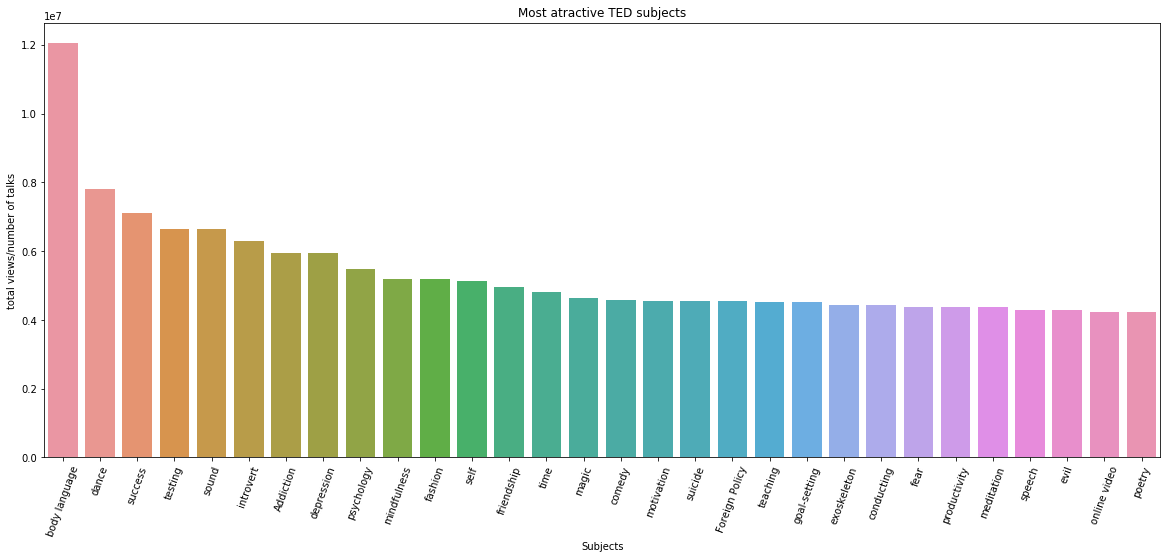

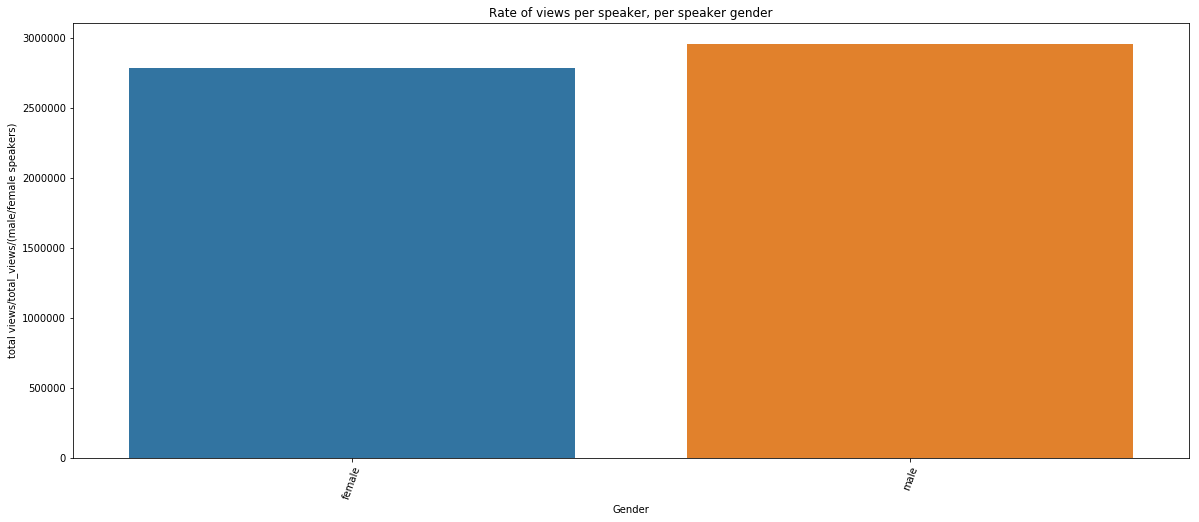

In [99]:
if __name__ == "__main__":
    data = acquire('ted_main.csv')
    transformed_data = wrangle(data)
    most_viewed_tags, df_views_per_speaker_by_genre = analyze(transformed_data)
    barchart1 = visualize1(most_viewed_tags)
    barchart2 = visualize2(df_views_per_speaker_by_genre)
    save_viz(barchart1, barchart2)
    

,tag,total_views,tag_count,views/tag_count
69,body language,84323831,7,1.204626e+07
62,dance,93768862,12,7.814072e+06
22,success,177963017,25,7.118521e+06
313,testing,6657858,1,6.657858e+06
152,sound,33203346,5,6.640669e+06
162,introvert,31519878,5,6.303976e+06
225,Addiction,17807677,3,5.935892e+06
71,depression,83096234,14,5.935445e+06
6,psychology,432071277,79,5.469257e+06
210,mindfulness,20821544,4,5.205386e+06


  speaker_gender  total_views/(male/female speakers)
1         female                        2.785104e+06
2           male                        2.957214e+06


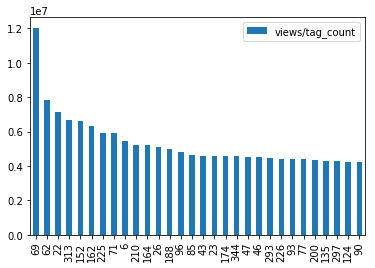

In [93]:
display(most_viewed_tags.head(30))
display(most_viewed_tags[['tag', 'views/tag_count']].head(30).plot.bar())
print(df_views_per_speaker_by_genre)

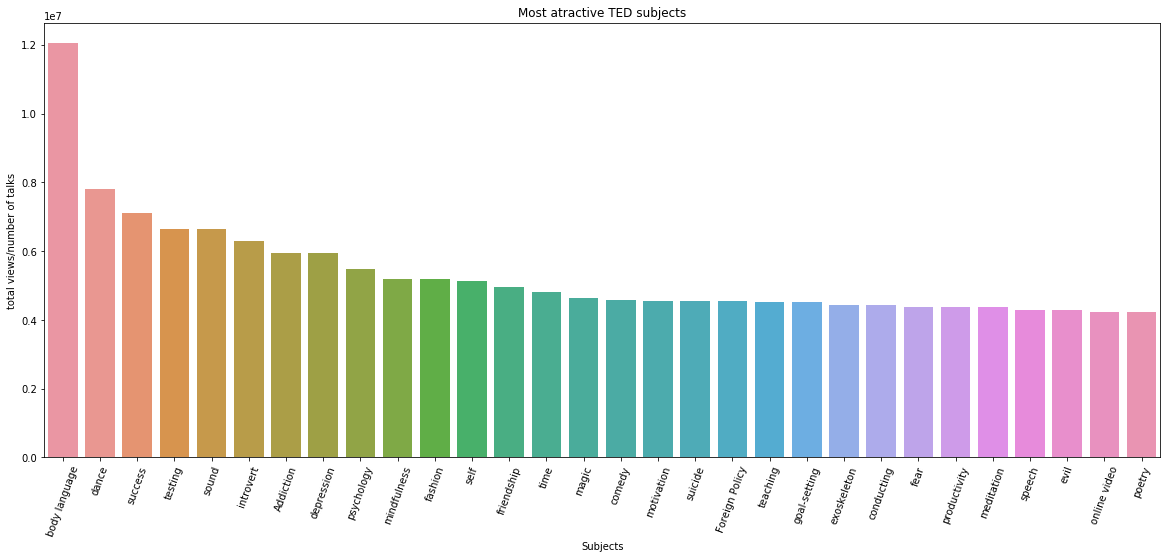

In [67]:
fig, ax = plt.subplots(figsize=(20, 8))
plt.xticks(rotation=70)
sns.barplot(most_viewed_tags.head(30)['tag'], most_viewed_tags.head(30)['views/tag_count'])
plt.xlabel('Subjects')
plt.ylabel('total views/number of talks')
plt.title('Most atractive TED subjects')
plt.savefig('Most atractive TED subjects.png')


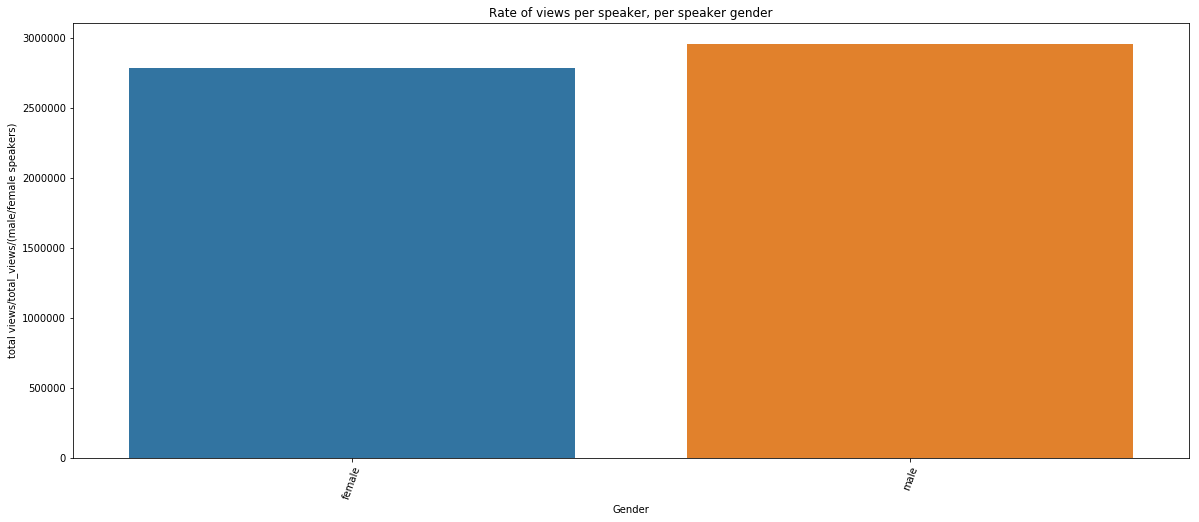

In [94]:
fig, ax = plt.subplots(figsize=(20, 8))
plt.xticks(rotation=70)
sns.barplot(df_views_per_speaker_by_genre['speaker_gender'], df_views_per_speaker_by_genre['total_views/(male/female speakers)'])
plt.xlabel('Gender')
plt.ylabel('total views/total_views/(male/female speakers)')
plt.title('Rate of views per speaker, per speaker gender')
plt.savefig('Rate of views per speaker, per speaker gender.png')